In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('spam_uci_ml.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename({'v1':'Target','v2':'Text'},axis=1,inplace=True)

In [8]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(403)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data['Target'].value_counts()

Target
ham     4516
spam     653
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [16]:
data['Target']=label.fit_transform(data['Target'])

In [17]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


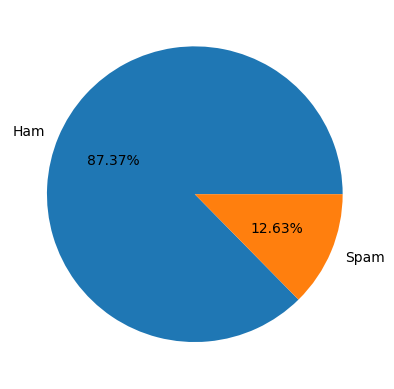

In [18]:
plt.pie(data['Target'].value_counts(),labels=['Ham','Spam'],autopct='%.2f%%')
plt.show()

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91810\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data['num_characters']=data['Text'].apply(len)

In [21]:
data.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
data['num_words']=data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
data['num_sentence']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
data.describe()

,Target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
data[data['Target']==0][['num_characters','num_words','num_sentence']].describe() ## Not Spam

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
data[data['Target']==1][['num_characters','num_words','num_sentence']].describe() ### Spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
## Creating Histogram for Spam and Non Spam Messages

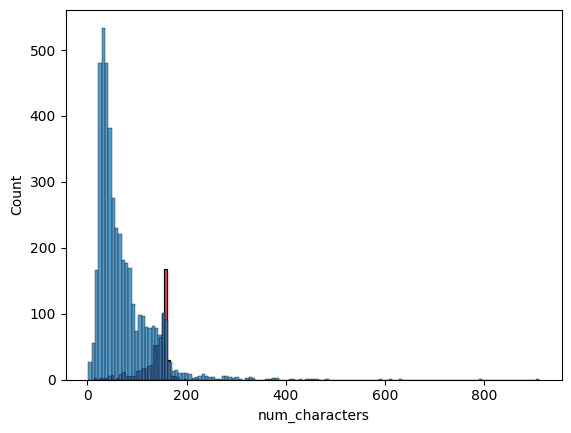

In [29]:
sns.histplot(data[data['Target']==1]['num_characters'],color='red') # Spam
sns.histplot(data[data['Target']==0]['num_characters']) # Not Spam
plt.show()

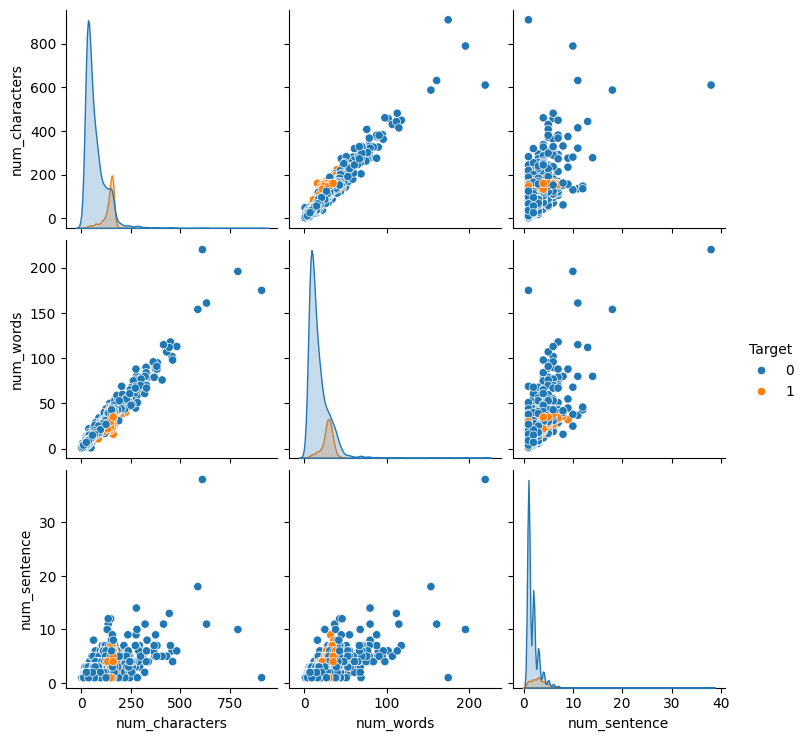

In [30]:
sns.pairplot(data,hue='Target')
plt.show()

In [31]:
## Out of these 3 columns we can keep Number of Characters as our Main column to decide Spam and Not Spam

In [32]:
## Text Preprocessing
## Lowercasing
## Tokenization
## Removing Special Characters
## Removing Stop words and Punctuation
## Lemmatization

In [33]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [34]:
def text_preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    
    words = [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]
    return lemma.lemmatize(' '.join(words))

In [35]:
data.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
data['Transformed_Text']=data['Text'].apply(text_preprocess)

In [37]:
data.head()

,Target,Text,num_characters,num_words,num_sentence,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [39]:
spam_wc=wc.generate(data[data['Target']==1]['Transformed_Text'].str.cat(sep=" "))

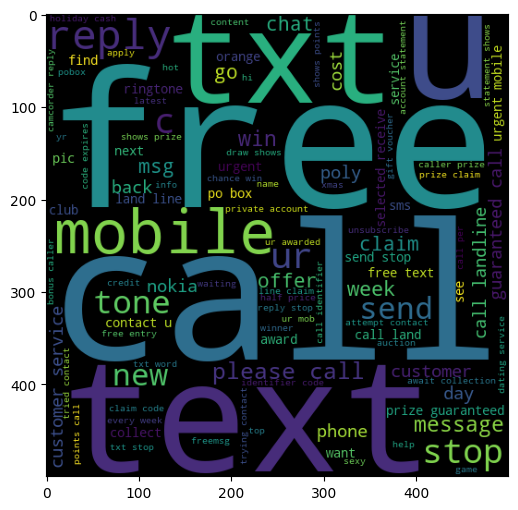

In [40]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)
plt.show()

In [41]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc=wc.generate(data[data['Target']==0]['Transformed_Text'].str.cat(sep=" "))

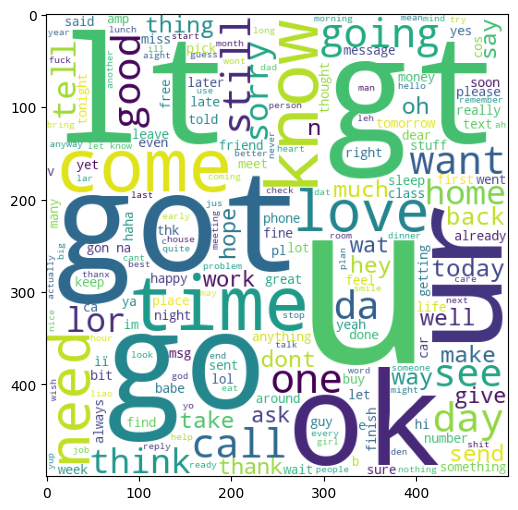

In [43]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)
plt.show()

In [44]:
## Feature Encoding

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [46]:
X=tfidf.fit_transform(data['Transformed_Text']).toarray()

In [47]:
y=data['Target'].values

In [48]:
X.shape

(5169, 3000)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
## ML Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [52]:
lr = LogisticRegression(max_iter=1000)

svc = SVC(kernel='sigmoid', gamma=1.0)

bernoulli=BernoulliNB()

multi=MultinomialNB()

gaussian=GaussianNB()

neighbors = KNeighborsClassifier(n_neighbors=5)

tree = DecisionTreeClassifier(max_depth=5, random_state=2)

forest = RandomForestClassifier(n_estimators=100, random_state=2)

xgb = XGBClassifier(
    n_estimators=100,
    random_state=2,
    eval_metric='logloss',
    use_label_encoder=False
)

adaboost = AdaBoostClassifier(n_estimators=100, random_state=2)

catboost = CatBoostClassifier(
    n_estimators=100,
    random_state=2,
    verbose=False
)

gradient = GradientBoostingClassifier(n_estimators=100, random_state=2)

bag = BaggingClassifier(n_estimators=100, random_state=2)

estimators = [
    ('multi', MultinomialNB()),
    ('forest', RandomForestClassifier(n_estimators=100, random_state=2))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000)
)

In [53]:
classifiers = {
    'Logistic Regression': lr,
    'Support Vector Classifier': svc,
    'Bernoulli Naive Bayes': bernoulli,
    'Multinomial Naive Bayes': multi,
    'Gaussian Naive Bayes': gaussian,
    'K Neighbors Classifier': neighbors,
    'Decision Tree': tree,
    'Random Forest': forest,
    'XGBoost': xgb,
    'AdaBoost': adaboost,
    'CatBoost': catboost,
    'Gradient Boosting': gradient,
    'Bagging': bag,
    'Stacking': stack
}

In [54]:
from sklearn.metrics import accuracy_score,precision_score

In [55]:
def classify(model, X_train, y_train, X_test, y_test):

    X_train_used = X_train
    X_test_used = X_test
    model.fit(X_train_used, y_train)
    y_pred = model.predict(X_test_used)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [56]:
accuracy_scores = []
precision_scores = []

for name, classifier in classifiers.items():

    current_accuracy, current_precision = classify(
        classifier, X_train, y_train, X_test, y_test
    )

    print(f"For {name}")
    print("Accuracy score is:", current_accuracy)
    print("Precision score is:", current_precision)
    print("-" * 50)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For Logistic Regression
Accuracy score is: 0.9564796905222437
Precision score is: 0.9385964912280702
--------------------------------------------------
For Support Vector Classifier
Accuracy score is: 0.9758220502901354
Precision score is: 0.9545454545454546
--------------------------------------------------
For Bernoulli Naive Bayes
Accuracy score is: 0.9738878143133463
Precision score is: 0.9538461538461539
--------------------------------------------------
For Multinomial Naive Bayes
Accuracy score is: 0.9738878143133463
Precision score is: 0.9916666666666667
--------------------------------------------------
For Gaussian Naive Bayes
Accuracy score is: 0.8694390715667312
Precision score is: 0.5223214285714286
--------------------------------------------------
For K Neighbors Classifier
Accuracy score is: 0.9100580270793037
Precision score is: 1.0
--------------------------------------------------
For Decision Tree
Accuracy score is: 0.9264990328820116
Precision score is: 0.785123966

c:\Users\91810\Desktop\Spam Email ML Classifier\venv\lib\site-packages\xgboost\training.py:199: UserWarning: [12:46:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


For XGBoost
Accuracy score is: 0.9661508704061895
Precision score is: 0.9296875
--------------------------------------------------
For AdaBoost
Accuracy score is: 0.9197292069632496
Precision score is: 0.8229166666666666
--------------------------------------------------
For CatBoost
Accuracy score is: 0.9632495164410058
Precision score is: 0.9734513274336283
--------------------------------------------------
For Gradient Boosting
Accuracy score is: 0.960348162475822
Precision score is: 0.940677966101695
--------------------------------------------------
For Bagging
Accuracy score is: 0.9564796905222437
Precision score is: 0.8571428571428571
--------------------------------------------------
For Stacking
Accuracy score is: 0.9825918762088974
Precision score is: 0.9774436090225563
--------------------------------------------------


In [57]:
Performance_df = pd.DataFrame({
    'Algorithm': list(classifiers.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)

In [58]:
Performance_df

,Algorithm,Accuracy,Precision
5,K Neighbors Classifier,0.910058,1.000000
3,Multinomial Naive Bayes,0.973888,0.991667
7,Random Forest,0.972921,0.983471
13,Stacking,0.982592,0.977444
10,CatBoost,0.963250,0.973451
1,Support Vector Classifier,0.975822,0.954545
2,Bernoulli Naive Bayes,0.973888,0.953846
11,Gradient Boosting,0.960348,0.940678
0,Logistic Regression,0.956480,0.938596
8,XGBoost,0.966151,0.929688


In [60]:
# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

param_grid={'n_estimators':[100,200],'max_depth':[4,6,8]}

random=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,n_iter=10,cv=5)

random.fit(X_train,y_train)

print(random.best_params_)
print(random.best_score_)

c:\Users\91810\Desktop\Spam Email ML Classifier\venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'max_depth': 8}
0.897944377267231


In [61]:
import pickle

In [63]:
with open('TFIDF.pkl','wb') as file:
    pickle.dump(tfidf,file)

In [64]:
with open('model.pkl','wb') as file:
    pickle.dump(multi,file)